### Importing the right libraries and plot styles.

In [10]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

### Upload the data and store it into variable <i>Data</i> and sort it by ascending order. View the data to become familiar with it. 

In [11]:
data = pd.read_excel('./Sales report.xlsx')
data.sort_values(by=['Monthly Sales'])

,Date,Monthly Sales,Sales
6,2022-02-01,18225,2534
5,2022-01-01,18381,2472
16,2022-12-01,19197,2138
7,2022-03-01,24647,3222
4,2021-12-01,25438,3531
3,2021-11-01,27235,3818
8,2022-04-01,28225,3445
15,2022-11-01,29481,2472
13,2022-09-01,29698,2906
14,2022-10-01,30457,3025


### Plot the data to visualize the table and see the correlation between sales and Revenue.

Text(0.5, 1.0, '# of Sales and Revenue')

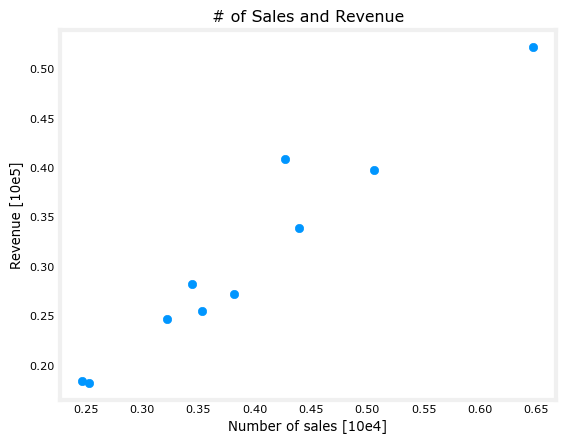

In [12]:
data = pd.read_excel('./Sales report.xlsx')
df = data.head(10)
x = np.array(df['Sales'])
x_train = x/10000
y = np.array(df['Monthly Sales'])
y_train = y/100000
plt.scatter(x_train, y_train)
plt.xlabel('Number of sales [10e4]')
plt.ylabel('Revenue [10e5]')
plt.title('# of Sales and Revenue')

### Compute the cost function for the total error between predicted and actual values. 

In [13]:
"""f_wb: the predicted value. x being the feature. In this case, it is the number of sales per month. 
cost: is the difference between predicted and actual value. Iterated over m. 
total_cost: is the final amount of the sum. 
"""
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Write the gradient function to compute the partial derivatives of w, and b. This will be used in the calculation of gradient descent.

In [14]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i])* x[i] # Partial derivative of the cost function w.r.t. w
        dj_db_i = f_wb - y[i] #Partial derivative of the cost function w.r.t. b
        dj_db += dj_db_i #the values is updated with each iteration
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

### Visualize the cost function with given different w and b values. 

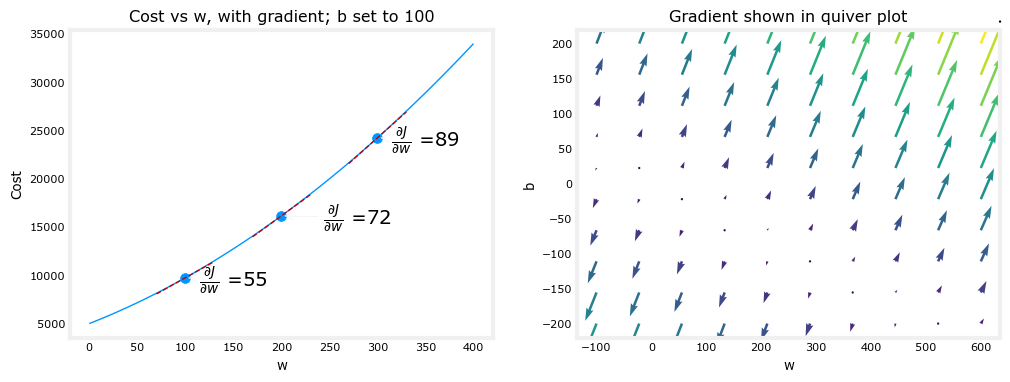

In [15]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

### Compute the gradient descent to find the best value of w and b to minimize the cost function. 

In [16]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        b = b - alpha * dj_db
        w = w- alpha * dj_dw
        
        if i<100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history #return w and J,w history for graphing

### Call the gradient descent function using the parameters from the tables and assign a number for iterations to find the best w, and b. Alpha and the number of iterations can be re-assigned for optimization. 

In [17]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 5000
tmp_alpha = 1.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.23e-02  dj_dw: -1.325e-01, dj_db: -3.089e-01   w:  1.325e-02, b: 3.08901e-02
Iteration  500: Cost 1.55e-03  dj_dw: -4.882e-03, dj_db:  1.937e-03   w:  4.361e-01, b: 1.39785e-01
Iteration 1000: Cost 7.22e-04  dj_dw: -2.773e-03, dj_db:  1.100e-03   w:  6.224e-01, b: 6.58590e-02
Iteration 1500: Cost 4.55e-04  dj_dw: -1.576e-03, dj_db:  6.251e-04   w:  7.283e-01, b: 2.38620e-02
Iteration 2000: Cost 3.70e-04  dj_dw: -8.951e-04, dj_db:  3.551e-04   w:  7.884e-01, b: 3.52565e-06
Iteration 2500: Cost 3.42e-04  dj_dw: -5.085e-04, dj_db:  2.017e-04   w:  8.226e-01, b:-1.35504e-02
Iteration 3000: Cost 3.33e-04  dj_dw: -2.889e-04, dj_db:  1.146e-04   w:  8.420e-01, b:-2.12504e-02
Iteration 3500: Cost 3.30e-04  dj_dw: -1.641e-04, dj_db:  6.511e-05   w:  8.530e-01, b:-2.56248e-02
Iteration 4000: Cost 3.29e-04  dj_dw: -9.323e-05, dj_db:  3.699e-05   w:  8.593e-01, b:-2.81099e-02
Iteration 4500: Cost 3.29e-04  dj_dw: -5.296e-05, dj_db:  2.101e-05   w:  8.628e-01, b:-2.95216e-02


### As shown, the cost vs iteration plot shows the cost function reaching a minimum.

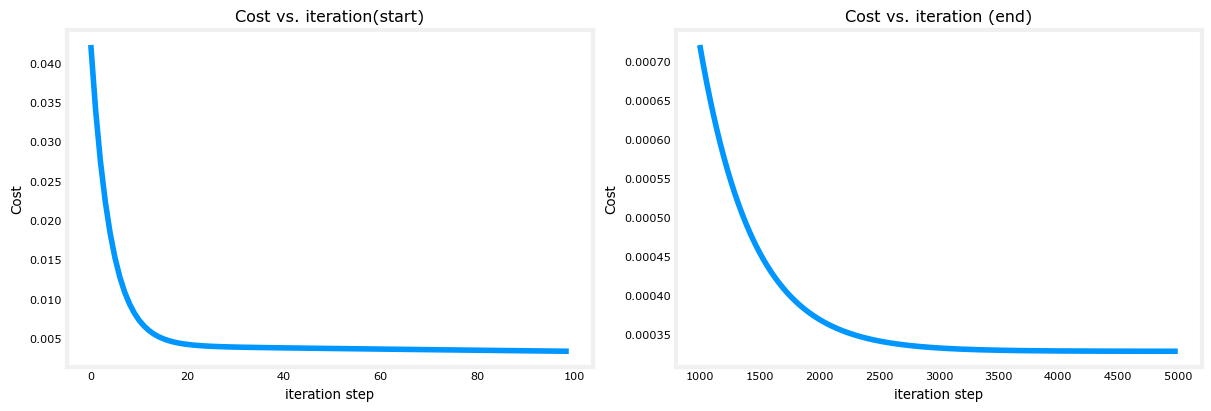

In [18]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [19]:
print(f"With 5,000 sales we should be generating about {w_final*0.5*100000 + b_final:0.1f} thousand dollars")

With 5,000 sales we should be generating about 43242.2 thousand dollars


In [20]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

Text(0.5, 0, 'Number of sales in 10,000s')

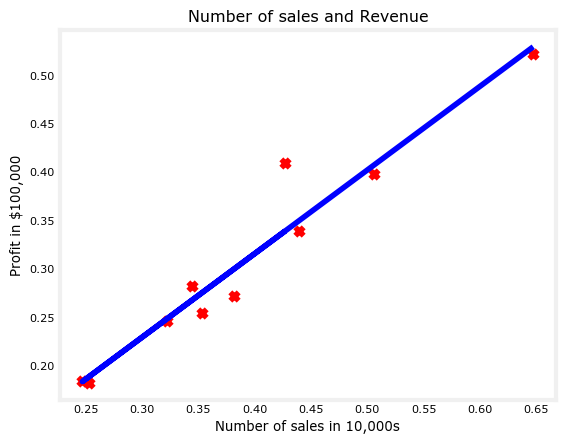

In [21]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Number of sales and Revenue")
# Set the y-axis label
plt.ylabel('Profit in $100,000')
# Set the x-axis label
plt.xlabel('Number of sales in 10,000s')